## Load Dataset

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [3]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value

df.drop("Loan_ID", axis=1, inplace=True)
np.random.seed(38084)
for i in range(df.shape[1]):
    empty = df.iloc[:, i].isnull()
    df.iloc[empty.values, i] = np.random.choice(
        df.iloc[~empty.values, i].values, len(df.iloc[empty.values, i]))

# # Checking the Missing Values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode 

In [4]:
# Task2 deal with categorical features
# Tip df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Gender = df.Gender.map({'Male': 1, 'Female': 0})
df.Married = df.Married.map({'Yes': 1, 'No': 0})
df.Education = df.Education.map({'Graduate': 1, 'Not Graduate': 0})
df.Self_Employed = df.Self_Employed.map({'Yes': 1, 'No': 0})
df.Property_Area = df.Property_Area.map(
    {'Urban': 1.0, 'Semiurban': 0.5, 'Rural': 0.0})
df.Loan_Status = df.Loan_Status.map({'Y': 1, 'N': 0})
df.Dependents = df.Dependents.map({'0': 0.0, '1': 1.0, '2': 2.0, '3+': 3.0})
df.ApplicantIncome = df.ApplicantIncome.astype("float64")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849.0,0.0,96.0,360.0,1.0,1.0,1
1,1,1,1.0,1,0,4583.0,1508.0,128.0,360.0,1.0,0.0,0
2,1,1,0.0,1,1,3000.0,0.0,66.0,360.0,1.0,1.0,1
3,1,1,0.0,0,0,2583.0,2358.0,120.0,360.0,1.0,1.0,1
4,1,0,0.0,1,0,6000.0,0.0,141.0,360.0,1.0,1.0,1


## Data process

In [5]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
array = np.array(df)
n = array.shape[0]
train_index = set(np.random.choice(n, int(n/4*3), replace=False))
test_index = set(range(n)) - train_index
(train, test) = (array[np.array(list(train_index)), :],
                 array[np.array(list(test_index)), :])
(X_train, y_train) = (train[:, :-1], train[:, -1:])
(X_test, y_test) = (test[:, :-1], test[:, -1:])
X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)

## Train

牛顿法


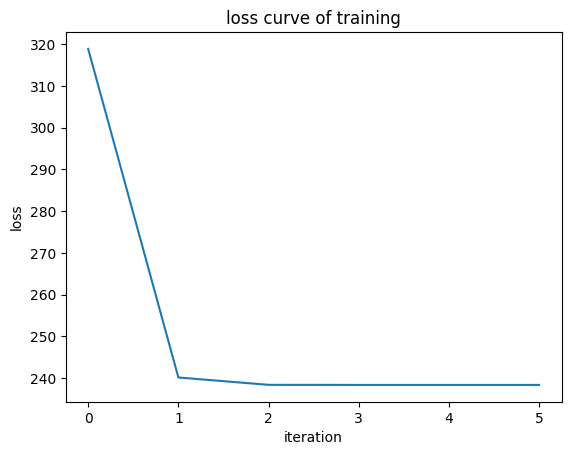

accuracy:0.9155844155844156

梯度下降法


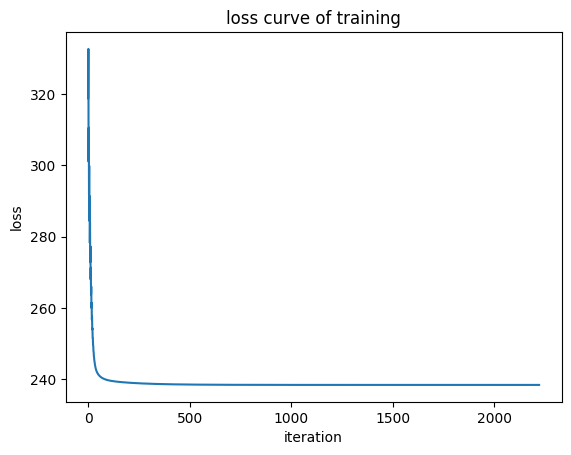

accuracy:0.9155844155844156



In [6]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt
# Task4 train your model and plot the loss curve of training
print('牛顿法')
model = LogisticRegression(gamma=0)
model.fit(X_train, y_train,pattern='newton')
result = model.predict(X_test)
delta = result-y_test
num = 0
for i in range(delta.shape[0]):
    if delta[i] != 0:
        num += 1
print('accuracy:{}\n'.format(1-num/delta.shape[0]))

print('梯度下降法')
model = LogisticRegression(gamma=0)
model.fit(X_train, y_train,pattern='gd')
result = model.predict(X_test)
delta = result-y_test
num = 0
for i in range(delta.shape[0]):
    if delta[i] != 0:
        num += 1
print('accuracy:{}\n'.format(1-num/delta.shape[0]))


## Test

In [7]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with

In [9]:
# 梯度下降法(步长0.005)
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(gamma=0, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, lr=0.005)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))


0.8153594771241834


In [9]:
# 梯度下降法(步长0.001)
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(gamma=0, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, lr=0.001)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))


0.8153594771241834


In [10]:
# 梯度下降法(步长0.005,l1正则化(参数2))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l1',gamma=2,plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, lr=0.005)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8120915032679743


In [11]:
# 梯度下降法(步长0.005,l1正则化(参数1))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l1', plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, lr=0.005)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8153594771241834


In [12]:
# 梯度下降法(步长0.005,l1正则化(参数0.5))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l1',gamma=0.5,plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, lr=0.005)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8153594771241834


In [13]:
# 梯度下降法(步长0.005,l2正则化(参数2))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l2',gamma=2, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, lr=0.005)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8137254901960789


In [14]:
# 梯度下降法(步长0.005,l2正则化(参数1))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l2',plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, lr=0.005)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8137254901960789


In [15]:
# 梯度下降法(步长0.005,l2正则化(参数0.5))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l2',gamma=0.5, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, lr=0.005)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8153594771241834


In [16]:
# 梯度下降法(步长0.005,tol=1e-5)
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(gamma=0, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, lr=0.005, tol=1e-5)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8153594771241834


In [17]:
# 梯度下降法(步长0.005,tol=1e-3)
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(gamma=0, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, lr=0.005, tol=1e-3)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8137254901960789


In [18]:
# 牛顿法
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(gamma=0, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8153594771241834


In [19]:
# 牛顿法(l1正则化(参数2))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l1',gamma=2, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1, tol=1e-1)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8137254901960789


In [20]:
# 牛顿法(l1正则化(参数1))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l1', plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1, tol=1e-1)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8153594771241834


In [21]:
# 牛顿法(l1正则化(参数0.5))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l1',gamma=0.5, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8153594771241834


In [22]:
# 牛顿法(l2正则化(参数2))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l2',gamma=2, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8137254901960789


In [23]:
# 牛顿法(l2正则化(参数1))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l2', plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8137254901960789


In [24]:
# 牛顿法(l2正则化(参数0.5))
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(penalty='l2',gamma=0.5, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8153594771241834


In [25]:
# 牛顿法(tol=1e-5)
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(gamma=0, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1,tol=1e-5)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8153594771241834


In [26]:
# 牛顿法(tol=1e-3)
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
positive = np.array(df.iloc[(df.iloc[:, 11] == 1.0).values, :])
negative = np.array(df.iloc[(~(df.iloc[:, 11] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(gamma=0, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1,tol=1e-3)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8153594771241834


In [27]:
# 牛顿法(保留第6789列特征)
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
_df = df.iloc[:,[6,7,8,9,11]]
positive = np.array(_df.iloc[(_df.iloc[:, 4] == 1.0).values, :])
negative = np.array(_df.iloc[(~(_df.iloc[:, 4] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(gamma=0, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8137254901960789


In [28]:
# 牛顿法(保留第69列特征)
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
_df = df.iloc[:,[6,9,11]]
positive = np.array(_df.iloc[(_df.iloc[:, 2] == 1.0).values, :])
negative = np.array(_df.iloc[(~(_df.iloc[:, 2] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(gamma=0, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8137254901960789


In [29]:
# 牛顿法(保留第9列特征)
from Logistic import LogisticRegression
np.random.seed(37)
df = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
_df = df.iloc[:,[9,11]]
positive = np.array(_df.iloc[(_df.iloc[:, 1] == 1.0).values, :])
negative = np.array(_df.iloc[(~(_df.iloc[:, 1] == 1.0)).values, :])
np.random.shuffle(positive)
np.random.shuffle(negative)
pn = positive.shape[0]
nn = negative.shape[0]
acc = []
model = LogisticRegression(gamma=0, plot=False)
for i in range(10):
    for i in range(4):
        test_index_p = set(range(i*int(pn/4), (i+1)*int(pn/4)))
        train_index_p = set(range(pn)) - test_index_p
        (train_p, test_p) = (positive[np.array(list(train_index_p)), :],
                             positive[np.array(list(test_index_p)), :])
        test_index_n = set(range(i*int(nn/4), (i+1)*int(nn/4)))
        train_index_n = set(range(nn)) - test_index_n
        (train_n, test_n) = (negative[np.array(list(train_index_n)), :],
                             negative[np.array(list(test_index_n)), :])
        (train, test) = (np.r_[train_p, train_n], np.r_[test_p, test_n])
        (X_train, y_train) = (train[:, :-1], train[:, -1:])
        (X_test, y_test) = (test[:, :-1], test[:, -1:])
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        model.fit(X_train, y_train, pattern='newton', lr=1)
        result = model.predict(X_test)
        delta = result-y_test
        num = 0
        for i in range(delta.shape[0]):
            if delta[i] == 0:
                num += 1
        acc.append(num / delta.shape[0])
print(sum(acc)/len(acc))

0.8120915032679743
